<a href="https://colab.research.google.com/github/zly554411-arch/ECON3916-Statistical-Machine-Learning/blob/main/Assignment%202/Econ_3916_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1: The Robustness Audit (Topic 4)

##Step 1.1: The "Latency" Trap
The Pitch: "NebulaCloud" claims a Mean Latency of 35ms.
The Reality: In a "Pareto World," the mean is a vanity metric. You suspect tail latency is high.

Task: Simulate the Data Generating Process (DGP) for a skewed system. Create a numpy array latency_logs with 1,000 requests:

980 "Normal" requests: Random integers between 20ms–50ms.

20 "Spike" requests: Random integers between 1000ms–5000ms.

In [8]:
# Manual DGP Simulation
import numpy as np
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

latency_logs

array([  42,   23,   37,   24,   35,   33,   46,   46,   38,   33,   28,
         25,   36,   38,   31,   23,   35,   44,   30,   41,   23,   36,
         27,   33,   46,   21,   30,   30,   43,   41,   43,   25,   40,
         40,   33,   49,   29,   45,   46,   27,   26,   27,   47,   27,
         42,   21,   46,   35,   28,   32,   42,   31,   46,   41,   44,
         48,   36,   46,   21,   32,   20,   45,   47,   38,   30,   24,
         20,   39,   49,   32,   27,   25,   48,   36,   31,   20,   22,
         33,   45,   27,   30,   46,   33,   27,   48,   22,   26,   47,
         38,   23,   44,   35,   32,   39,   38,   24,   42,   24,   39,
         43,   23,   21,   45,   32,   49,   35,   41,   21,   38,   36,
         24,   44,   37,   47,   42,   40,   37,   27,   46,   34,   32,
         32,   35,   41,   39,   32,   39,   21,   22,   34,   42,   38,
         32,   24,   45,   41,   25,   33,   23,   41,   38,   42,   26,
         23,   21,   46,   26,   22,   34,   20,   

Step 1.2: Manual MAD vs. SD
Task: Write a function calculate_mad(data) from scratch to prove the stability of robust statistics.

Constraint: Do NOT use scipy.stats. You must perform the vector subtraction and median calculation manually using numpy.

In [9]:
def calculate_mad(data):
    # 1. Calculate the Median of the data
    median = np.median(data)
    # 2. Calculate Absolute Deviations (|x - median|)
    absolute_deviations = np.abs(data - median)
    # 3. Return the Median of those deviations
    mad = np.median(absolute_deviations)

    return mad

sd = np.std(latency_logs)
mad = calculate_mad(latency_logs)

print(f"Standard Deviation(SD): {sd:.4f}")
print(f"Manual Absolute Deviations(MAD): {mad:.4f}")

Standard Deviation(SD): 419.6286
Manual Absolute Deviations(MAD): 8.0000


Analysis: Compare the Standard Deviation (SD) vs. MAD. Explain why the SD is "exploded" by the 20 outliers while the MAD remains stable.


In this example, the dataset is heavily skewed because of 20 extreme latency spikes.
The Standard Deviation (SD) measures the average distance from the mean, and because it squares deviations, extreme observations disproportionately inflate the estimate.

In contrast, the Median Absolute Deviation (MAD) measures the median distance from the median, which is robust to outliers. Since the median is unaffected by extreme values, the MAD remains stable even in the presence of latency spikes. At the same time, using Absolute Deviations (|x - median|) can ignore these extreme and skewed data, without any exponential effect on dataset.

#Phase 2: The Probability Audit (Topic 5)
#Step 2.1: The False Positive Paradox
The Pitch: "IntegrityAI" claims their plagiarism detector is 98% Accurate (Sensitivity=98%, Specificity=98%).
The Reality: In an Honors Seminar, cheating is rare (Base Rate = 0.1%).

Task: Write a function bayesian_audit(prior, sensitivity, specificity) that calculates the Posterior Probability: P(Cheater | Flagged).

Scenarios to Test:

Scenario A (Bootcamp): Base Rate = 50%
Scenario B (Econ Class): Base Rate = 5%
Scenario C (Honors Seminar): Base Rate = 0.1%

In [10]:
def bayesian_audit(prior, sensitivity=0.98, specificity=0.98):
  posterior_probability = (sensitivity * prior) / ((sensitivity * prior) + (1 - specificity) * (1 - prior))
  return posterior_probability

# Scenario A (Bootcamp): Base Rate = 50%
scenario_A = bayesian_audit(0.5)
# Scenario B (Econ Class): Base Rate = 5%
scenario_B = bayesian_audit(0.05)
# Scenario C (Honors Seminar): Base Rate = 0.1%
scenario_C = bayesian_audit(0.001)


print("Scenario A (Bootcamp):", scenario_A)
print("Scenario B (Econ Class):", scenario_B)
print("Scenario C (Honors Seminar):", scenario_C)

Scenario A (Bootcamp): 0.98
Scenario B (Econ Class): 0.7205882352941175
Scenario C (Honors Seminar): 0.04675572519083965


#Phase 3: The Bias Audit (Topic 6)
#Step 3.1: Detecting Sample Ratio Mismatch (SRM)
The Pitch: "FinFlash" ran an A/B test with 100,000 users (50/50 split). They claim a huge win.
The Data: Control Users = 50,250 | Treatment Users = 49,750.

Task: The "missing" 500 users in Treatment are suspicious. Did the app crash? Perform a Chi-Square Goodness of Fit Test manually.

In [11]:
# Chi-Square Formula: Sum( (Observed - Expected)^2 / Expected )
from scipy.stats import chisquare

observed = np.array([50250,49750])
expected = np.array([50000,50000])

chi2_stat = np.sum((observed - expected)**2 / expected)
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print()

if p_value < 0.05:
    print("INVALID")
else:
    print("VALID")

Chi-Square Statistic: 2.5000
P-value: 0.113846

VALID


#Phase 4: AI Expansion (The Co-Pilot Era)
#Task 4.1: The "Memecoin Graveyard" Simulation
The Problem: Financial data often deletes failures (Survivorship Bias). On platforms like Pump.fun, 98.6% of tokens fail. Analyzing only "Listed Coins" is a statistical lie.

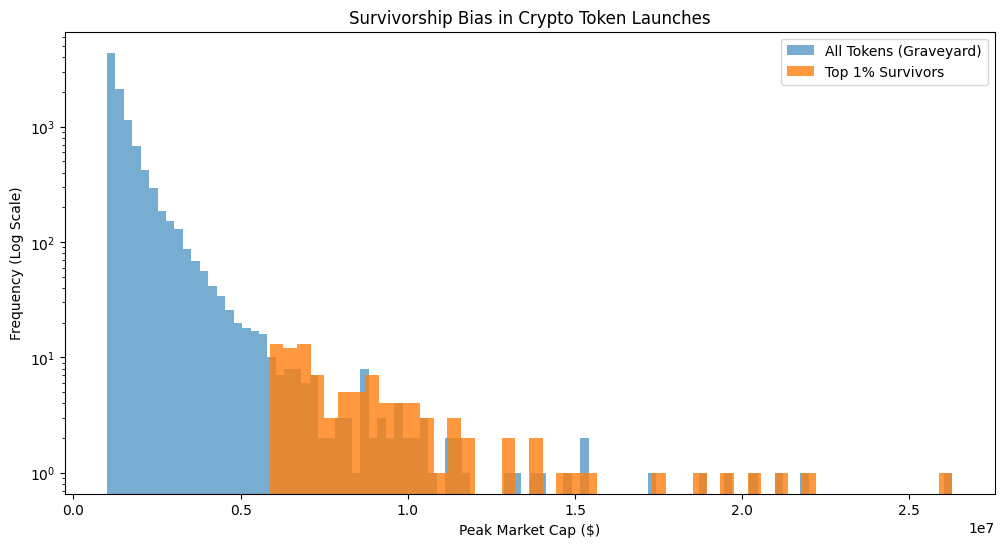

Mean Market Cap (All Tokens - Graveyard): $1,635,995.43
Mean Market Cap (Top 1% Survivors): $9,262,588.53


In [12]:
# (P)rep: Financial Data Scientist Simulation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# -----------------------------
# (R)equest & (I)terate
# Simulate 10,000 token launches
# -----------------------------
n_tokens = 10000

# Pareto distribution (Power Law)
# Higher alpha → more extreme skew toward small values
alpha = 2.5

# Generate Peak Market Cap (scale to realistic dollar values)
peak_market_caps = (np.random.pareto(alpha, n_tokens) + 1) * 1e6

# Create full dataset (The Graveyard)
df_all = pd.DataFrame({
    "Peak Market Cap": peak_market_caps
})

# -----------------------------
# Select Top 1% Survivors
# -----------------------------
threshold = df_all["Peak Market Cap"].quantile(0.99)
df_survivors = df_all[df_all["Peak Market Cap"] >= threshold]

# -----------------------------
# (M)echanism: Visualization
# -----------------------------
plt.figure(figsize=(12, 6))

# Histogram of all tokens
plt.hist(df_all["Peak Market Cap"],
         bins=100,
         alpha=0.6,
         label="All Tokens (Graveyard)",
         log=True)

# Histogram of survivors
plt.hist(df_survivors["Peak Market Cap"],
         bins=50,
         alpha=0.8,
         label="Top 1% Survivors",
         log=True)

plt.xlabel("Peak Market Cap ($)")
plt.ylabel("Frequency (Log Scale)")
plt.title("Survivorship Bias in Crypto Token Launches")
plt.legend()

plt.show()

# -----------------------------
# (E)valuate: Mean Comparison
# -----------------------------
mean_all = df_all["Peak Market Cap"].mean()
mean_survivors = df_survivors["Peak Market Cap"].mean()

print("Mean Market Cap (All Tokens - Graveyard): ${:,.2f}".format(mean_all))
print("Mean Market Cap (Top 1% Survivors): ${:,.2f}".format(mean_survivors))
